In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE

from scipy import stats

import shap

%matplotlib inline

In [3]:
data = pd.read_csv("housing.csv")
data.drop(columns=["id"], inplace=True)
data["date"] = pd.to_datetime(data["date"])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Visual Insepction

(0.0, 2000000.0)

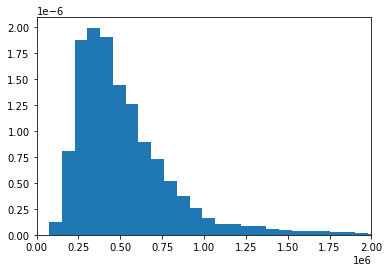

In [25]:
fig, ax = plt.subplots(1, 1)
ax.hist(data["price"], bins=100, density=True)
ax.set_xlim(0, 2000000)

# Plotting Housing Locations

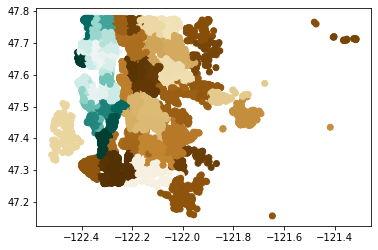

In [10]:
plt.scatter(data["long"], data["lat"], c=data["zipcode"], cmap=plt.get_cmap("BrBG"))

# Predicting Price

First, we try regressing on the full dataset with no data enginering to get a base idea of accuracy. We use a standard linear regression with no HP tuning or advanced methods.

In [11]:
X = data.drop(columns=["price", "date"])
y = data["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

model = LinearRegression()

model.fit(X_train, Y_train)

preds = model.predict(X_test)

mean_squared_error(preds, Y_test)

r2_score(preds, Y_test)

0.49996717238816846

# Location Categorization

In [42]:
column_trans = ColumnTransformer(
    [('categories', OneHotEncoder(sparse=False), ['zipcode'])], remainder="passthrough")

test = column_trans.fit_transform(data)
names = column_trans.get_feature_names_out()
data_cat = pd.DataFrame(data=test, columns=names).drop(columns=["remainder__long", "remainder__lat"])

In [43]:
X = data_cat.drop(columns=["remainder__price", "remainder__date"])
y = data_cat["remainder__price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

model = LinearRegression()

model.fit(X_train, Y_train)

preds = model.predict(X_test)

mean_squared_error(preds, Y_test)

r2_score(preds, Y_test)

0.7478731609049156

# Feature Elimination

In [ ]:
model = RFE(LinearRegression(), 7)

model.fit(X_train, Y_train)

preds = model.predict(X_test)

mean_squared_error(preds, Y_test)

r2_score(preds, Y_test)